In [6]:
%matplotlib inline
import json
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
from matplotlib.ticker import MultipleLocator

In [7]:
regions = ["US-TEX", "US-CAL", "AU-SA", "NL", "GB" ]
REGIONS = ["TX", "CA", "SA", "NL", "GB"] #["Texas (US)", "California (US)", "South Australia", "Netherland", "Great Britain"]
torelance = 0.1

/tmp/ipykernel_7311/4191563650.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(REGIONS)#, rotation=35, ha="right")


[52.02161757588025, 58.280632235740256, 43.78060824865756, 56.30966524856797, 57.12726034065215]
[94.36993819607724, 93.44238520725524, 96.83664338393834, 92.6221146181413, 91.95630956355359]


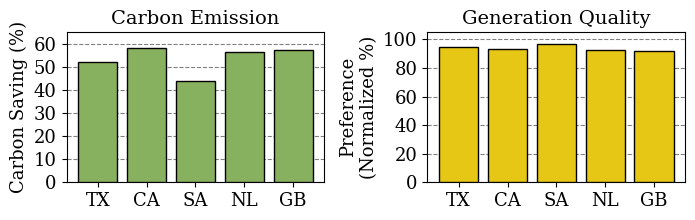

In [11]:
keys = ["carbon_per_req", "quality_preference"]
optimizers = ["lp", "baseline"]
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.8, 'right':0.995, 'left':0.17}, figsize=(7.5,2.5))
colors = ["#88B15F", "#E6C716"] #["#172a54", "#01329b"]#
TITLES = ["Carbon Emission", "Generation Quality"]
YLABELS = ["Carbon Saving (%)", "Preference\n(Normalized %)"]
width = 0.8
for i, key in enumerate(keys):
    y = []
    for region in regions:
        read_val = []
        for optimizer in optimizers:
            file = f"../system/results/{region}/torelance_{torelance}/{optimizer}_opt_pai_gen.json"
            with open(file) as f:
                data = json.load(f)
            if key == "carbon_per_req":
                read_val.append(np.mean(data[key]))
            else: #TODO
                read_val.append(np.mean(np.array(data[key] / np.array(data["pref_max"]))))
        if "carbon" in key:
            y.append( (read_val[1] - read_val[0]) / read_val[1] * 100 ) # carbon saving percentage
        else:
            y.append(read_val[0] / read_val[1] * 100) # quality preference
    ax = axs[i]
    bars = ax.bar(REGIONS, y, color=colors[i], width=width, zorder=3, edgecolor='black')    
    ax.grid(which='both', axis='y', color='grey', ls='dashed', zorder=0)
    ax.set_title(TITLES[i], fontsize=14)
    ax.set_xticklabels(REGIONS)#, rotation=35, ha="right")
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ylabel(YLABELS[i], fontsize=13)
    print(y)
    # for bar in bars:
    #     height = bar.get_height()
    #     axs[i].text(bar.get_x() + bar.get_width() / 2, height*1.07,
    #                 round(height, 1), ha='center', va='bottom')
axs[0].set_ylim(0, 65)
axs[0].yaxis.set_major_locator(MultipleLocator(10))
axs[1].set_ylim(0, 105)
axs[1].yaxis.set_major_locator(MultipleLocator(20))
# axs[1].axhline(100, color='red', linestyle='--')
# save figure
plt.savefig(f"figures/fig0_overall.pdf", bbox_inches='tight')